In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

import time

In [6]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

In [7]:
def make_mi_scores_Regressor(X_train, y_train):
    # All discrete features should now have integer dtypes (double-check this before using MI!)
    discrete_features = X_train.dtypes == int
    mi_scores = mutual_info_regression(X_train, y_train, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(figsize=(20,14))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [8]:
def apply_pca(X,alias, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    
    # Convert to dataframe
    component_names = [f"PC_{alias}{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    #print( pca.components_)
    return pca, X_pca, loadings

In [9]:
def make_submission(preds,alias,path='sample_submission.csv',target_col='SalePrice'):
    sub = pd.read_csv(path)
    sub.loc[:,target_col]=preds
    to = 'submissions/submission_'+alias+'.csv'
    sub.to_csv(to,index=False)

In [10]:
import pickle 

## opening
loaded={}
with open('kaggle-ensemble-model.bin', 'rb') as f_in:
    loaded['catboost'] ,loaded['xgb'],loaded['lightgbm'],loaded['hgrd'] = pickle.load(f_in)

In [11]:
loaded

{'catboost': <catboost.core.CatBoostRegressor at 0x1d93530d850>,
 'xgb': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4064, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0139, max_delta_step=0, max_depth=4,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=4500, n_jobs=4, nthread=-1, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=2,
              seed=42, subsample=0.7968, tree_method='exact',
              validate_parameters=1, verbosity=None),
 'lightgbm': LGBMRegressor(learning_rate=0.13705339989856127, max_depth=2, n_estimators=273,
               num_leaves=39),
 'hgrd': HistGradientBoostingRegressor(learning_rate=0.15, loss='least_squares',
                               max_depth=2, max_iter=225, max_leaf_nodes=29,
                     

In [12]:
train = pd.read_csv("ALL_train.csv")
test = pd.read_csv("ALL_test.csv")

In [13]:
train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Neighborhood_mapped,MasExist,AirCon,Electrical_SBrkr,Functional_Typ,GarageType_InHome,PavedDrive1,HasFence,MiscFeature1,SaleType_New_House,SaleCon_Normal,HasPool,Has2ndFloor,HasFireplace,total_Utility_Count,SqFtPerRoom,Total_Home_Quality,Product_Home_Quality,Total_Bathrooms,TotalSF,TotalPorchSF,YearBlRm,TotalExtQual,ProductExtQual,TotalBsmQual_And_Fin,TotalBsmQual,ProductBsmQual,TotalBsmFin,TotalGrgQual,ProductGrgQual,TotalQual,QualGr,QualPorch,QualExt,QualGrg,QlLivArea,QualSFNg,ProBsmQualPerTotFin,Age_YrBuilt,Age_YrRmd,Diff_YrRmd_YrBlt,Age_GarageYrBlt,Diff_GarYBlt_YrBlt,LivLotRatio,Spaciousness,GrArea+Basement,YrRemod*Basement,Count_OutSideSF,Rat_Out_Count,total_Area,Count_Areas,Rat_Areas_Count,total_Floors,Count_Floors,Rat_Floors_Count,Tot_Bsmt_per_Fin,OverallCond_Price_grade,space_Cluster,Areas_Cluster,Floors_Cluster,OutsideSF_Cluster,OverAll_QC_Cluster,YrBlt_Cluster,Cyclic_MoSold,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,rare_Exterior1st_BrkFace,rare_Exterior1st_CemntBd,rare_Exterior1st_HdBoard,rare_Exterior1st_MetalSd,rare_Exterior1st_Plywood,rare_Exterior1st_RARE,rare_Exterior1st_VinylSd,rare_Exterior1st_Wd Sdng,rare_Exterior1st_WdShing,rare_Exterior2nd_CmentBd,rare_Exterior2nd_HdBoard,rare_Exterior2nd_MetalSd,rare_Exterior2nd_Plywood,rare_Exterior2nd_RARE,rare_Exterior2nd_VinylSd,rare_Exterior2nd_Wd Sdng,rare_Exterior2nd_Wd Shng,rare_Alley_None,rare_Alley_RARE,rare_Condition1_Norm,rare_Condition1_RARE,rare_SaleType_COD,rare_SaleType_ConLD,rare_SaleType_New,rare_SaleType_RARE,rare_SaleType_WD,rare_RoofStyle_Flat,rare_RoofStyle_Gable,rare_RoofStyle_Gambrel,rare_RoofStyle_Hip,rare_RoofStyle_RARE,rare_LotShape_IR1,rare_LotShape_RARE,rare_LotShape_Reg,rare_LandContour_Lvl,rare_LandContour_RARE,rare_LandSlope_Gtl,rare_LandSlope_RARE,rare_Foundation_BrkTil,rare_Foundation_CBlock,rare_Foundation_PConc,rare_Foundation_RARE,SalePrice
0,-0.095171,-0.131627,0.654978,-0.460599,1.046122,0.878381,1.193962,-0.20602,0.152284,1.165653,0.780329,-0.237394,-0.35548,-0.340020,0.003292,-0.804101,1.181803,-0.133649,0.533750,1.149702,-0.243011,0.793103,1.259695,0.163837,-0.207681,0.949939,-1.012897,-1.007664,1.031414,0.313041,0.352645,0.264059,-0.946016,0.846956,-0.404405,-0.128566,-0.292878,-0.069416,-0.190549,0.415511,1.218819,0.263909,0.30611,0.271263,0.696953,0.256401,-0.488405,-0.196046,-0.300722,0.321917,-0.069433,1.147115,-1.055695,0.965642,-0.483214,0.193712,0.124504,1.648502,0.706504,-0.058275,1.095485,0.773126,0.779697,0.599034,0.326973,0.408691,0.932846,0.26094,0.272066,0.951015,0.791120,0.097411,1.214700,0.350881,0.796987,0.669539,-0.530239,-0.959050,-0.608260,-0.756946,-0.877031,-0.355167,0.259826,-0.288821,0.147815,0.088785,-0.342297,0.091339,-0.106300,1.078263,

In [14]:
test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Neighborhood_mapped,MasExist,AirCon,Electrical_SBrkr,Functional_Typ,GarageType_InHome,PavedDrive1,HasFence,MiscFeature1,SaleType_New_House,SaleCon_Normal,HasPool,Has2ndFloor,HasFireplace,total_Utility_Count,SqFtPerRoom,Total_Home_Quality,Product_Home_Quality,Total_Bathrooms,TotalSF,TotalPorchSF,YearBlRm,TotalExtQual,ProductExtQual,TotalBsmQual_And_Fin,TotalBsmQual,ProductBsmQual,TotalBsmFin,TotalGrgQual,ProductGrgQual,TotalQual,QualGr,QualPorch,QualExt,QualGrg,QlLivArea,QualSFNg,ProBsmQualPerTotFin,Age_YrBuilt,Age_YrRmd,Diff_YrRmd_YrBlt,Age_GarageYrBlt,Diff_GarYBlt_YrBlt,LivLotRatio,Spaciousness,GrArea+Basement,YrRemod*Basement,Count_OutSideSF,Rat_Out_Count,total_Area,Count_Areas,Rat_Areas_Count,total_Floors,Count_Floors,Rat_Floors_Count,Tot_Bsmt_per_Fin,OverallCond_Price_grade,space_Cluster,Areas_Cluster,Floors_Cluster,OutsideSF_Cluster,OverAll_QC_Cluster,YrBlt_Cluster,Cyclic_MoSold,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,rare_Exterior1st_BrkFace,rare_Exterior1st_CemntBd,rare_Exterior1st_HdBoard,rare_Exterior1st_MetalSd,rare_Exterior1st_Plywood,rare_Exterior1st_RARE,rare_Exterior1st_VinylSd,rare_Exterior1st_Wd Sdng,rare_Exterior1st_WdShing,rare_Exterior2nd_CmentBd,rare_Exterior2nd_HdBoard,rare_Exterior2nd_MetalSd,rare_Exterior2nd_Plywood,rare_Exterior2nd_RARE,rare_Exterior2nd_VinylSd,rare_Exterior2nd_Wd Sdng,rare_Exterior2nd_Wd Shng,rare_Alley_None,rare_Alley_RARE,rare_Condition1_Norm,rare_Condition1_RARE,rare_SaleType_COD,rare_SaleType_ConLD,rare_SaleType_New,rare_SaleType_RARE,rare_SaleType_WD,rare_RoofStyle_Flat,rare_RoofStyle_Gable,rare_RoofStyle_Gambrel,rare_RoofStyle_Hip,rare_RoofStyle_RARE,rare_LotShape_IR1,rare_LotShape_RARE,rare_LotShape_Reg,rare_LandContour_Lvl,rare_LandContour_RARE,rare_LandSlope_Gtl,rare_LandSlope_RARE,rare_Foundation_BrkTil,rare_Foundation_CBlock,rare_Foundation_PConc,rare_Foundation_RARE,SalePrice
0,0.508353,0.486131,-0.795118,24.530725,-0.330864,187473.961634,-0.814114,-0.20602,0.152284,-0.258311,0.643093,1.189924,2.341989,-0.024536,0.029390,-0.659856,-0.869439,-0.133649,-1.412168,-0.832529,-0.243011,-1.026295,-0.768931,-1.061998,-0.207681,-0.945997,-1.012897,-1.007664,156778.316021,-1.026334,1.204969,0.264059,0.960774,-1.072458,-0.404405,-0.128566,3.124990,-0.069416,-0.190549,-0.498156,-0.820466,0.263909,0.30611,0.271263,0.696953,0.256401,2.047479,-0.196046,-0.300722,0.321917,-0.069433,-0.871752,-1.055695,0.425225,-1.105142,-5.432238,-0.418388,-1.935752,-0.591974,0.634590,-0.748367,-0.709122,-0.664964,0.099481,-0.071997,-0.188051,0.088015,0.26094,0.272066,-0.429808,-1.263349,0.566654,-0.821408,1.181213,-1.249868,-0.883091,-0.460551,0.654307,36.054028,-0.756946,36.408991,-0.355167,-1.032308,-1.213443,-1.028894,0.092564,0.93

In [15]:
features = train.columns.drop('SalePrice')

train_final = train[features]
log_target = np.log1p(train['SalePrice'])

test_final = test[features]

In [ ]:
loaded_predictions1 = (
    0.5 * np.exp(loaded['catboost'].predict(test_final)) +
    0.2 * np.exp(loaded['xgb'].predict(test_final)) +
    0.2 * np.exp(loaded['lightgbm'].predict(test_final)) +
    0.1 * np.exp(loaded['hgrd'].predict(test_final)) 
    #0.1 * np.exp(models['omp'].predict(test_final))
)

In [23]:
preds_df_train = pd.DataFrame()

preds_df_train['catboost'] = loaded['catboost'].predict(train_final)
preds_df_train['xgb'] = loaded['xgb'].predict(train_final)
preds_df_train['lightgbm'] = loaded['lightgbm'].predict(train_final)
preds_df_train['hgrd'] = loaded['hgrd'].predict(train_final)
preds_df_train['log_target'] = log_target 
preds_df_train

,catboost,xgb,lightgbm,hgrd,log_target
0,12.236238,12.247216,12.256134,12.262794,12.247699
1,12.125070,12.114108,12.140619,12.125556,12.109016
2,12.293193,12.314108,12.279545,12.303912,12.317171
3,11.927344,11.857558,12.008392,12.024194,11.849405
4,12.596760,12.462784,12.601311,12.600361,12.429220
...,...,...,...,...,...
1454,12.075449,12.071163,12.092813,12.078685,12.072547
1455,12.272121,12.248405,12.233365,12.217821,12.254868
1456,12.487225,12.493405,12.509600,12.514449,12.493133
1457,11.857889,11.863262,11.882748,11.869292,11.864469


In [22]:
preds_df_test = pd.DataFrame()

preds_df_test['catboost'] = loaded['catboost'].predict(test_final)
preds_df_test['xgb'] = loaded['xgb'].predict(test_final)
preds_df_test['lightgbm'] = loaded['lightgbm'].predict(test_final)
preds_df_test['hgrd'] = loaded['hgrd'].predict(test_final)
preds_df_test['log_target'] = 0 
preds_df_test

,catboost,xgb,lightgbm,hgrd,log_target
0,11.762218,11.712785,11.786484,11.735367,0
1,11.971720,11.968068,11.977135,11.961067,0
2,12.102203,12.061403,12.136828,12.125903,0
3,12.129492,12.097714,12.150381,12.137708,0
4,12.117155,12.081630,12.074883,12.039156,0
...,...,...,...,...,...
1454,11.324270,11.286779,11.223014,11.226494,0
1455,11.294896,11.322433,11.345775,11.263001,0
1456,11.929437,11.850513,11.929187,11.952360,0
1457,11.684917,11.630768,11.688073,11.688158,0


In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,min_samples_split=10)

In [11]:
preds_df_train.columns

Index(['catboost', 'xgb', 'lightgbm', 'hgrd', 'log_target'], dtype='object')

In [12]:
lr.fit(preds_df_train[['catboost', 'xgb', 'lightgbm', 'hgrd']],preds_df_train['log_target'])

LinearRegression()

In [26]:
rf.fit(preds_df_train[['catboost', 'xgb', 'lightgbm', 'hgrd']],preds_df_train['log_target'])

RandomForestRegressor(min_samples_split=10, n_estimators=200)

In [21]:
lr_preds = lr.predict(preds_df_test[['catboost', 'xgb', 'lightgbm', 'hgrd']])

In [31]:
rf_preds = rf.predict(preds_df_test[['catboost', 'xgb', 'lightgbm', 'hgrd']])

In [29]:
lr.coef_ ,rf.feature_importances_

(array([-0.1597055 ,  1.16313721, -0.01228716,  0.00830074]),
 array([3.93548271e-03, 9.94575346e-01, 1.21313351e-03, 2.76037903e-04]))

In [23]:
np.exp(lr_preds)

array([121096.34575306, 157525.64479667, 171866.34962654, ...,
       138396.93538412, 111536.5459823 , 191763.397623  ])

In [32]:
np.exp(rf_preds)

array([121666.017328  , 157613.0270493 , 172572.45006049, ...,
       139242.07997173, 111075.55707992, 191899.98049871])

In [24]:
make_submission(preds=np.exp(lr_preds),alias='stacking_lr',path='sample_submission.csv',target_col='SalePrice')

In [33]:
make_submission(preds=np.exp(rf_preds),alias='stacking_rf',path='sample_submission.csv',target_col='SalePrice')

In [24]:
pca_ps, X_pca_ps, loadings_ps = apply_pca(X=preds_df_train[['catboost', 'xgb', 'lightgbm', 'hgrd']],alias='preds', standardize=False)

In [25]:
loadings_ps

,PC_preds1,PC_preds2,PC_preds3,PC_preds4
catboost,-0.501283,-0.099008,-0.811875,0.282439
xgb,-0.508401,-0.767396,0.385566,-0.063022
lightgbm,-0.495880,0.386619,-0.011451,-0.777494
hgrd,-0.494314,0.501824,0.438255,0.558354


In [26]:
pca_ps2, X_pca_ps2, loadings_ps2 = apply_pca(X=preds_df_test[['catboost', 'xgb', 'lightgbm', 'hgrd']],alias='preds', standardize=False)

In [27]:
test_pca = pca_ps.transform(preds_df_test[['catboost', 'xgb', 'lightgbm', 'hgrd']])
alias ='preds'
component_names = [f"PC_{alias}{i+1}" for i in range(X_pca_ps.shape[1])]
test_pca = pd.DataFrame(test_pca, columns=component_names)
test_pca

,PC_preds1,PC_preds2,PC_preds3,PC_preds4
0,0.549950,0.028024,-0.031263,-0.030887
1,0.109038,-0.001651,-0.006193,-0.010013
2,-0.164492,0.058264,-0.005730,-0.011165
3,-0.209188,0.038861,-0.008866,-0.009692
4,-0.108673,-0.026219,-0.047378,-0.008490
...,...,...,...,...
1454,1.517025,-0.074914,-0.056521,0.026231
1455,1.434703,-0.033585,-0.004333,-0.059374
1456,0.218079,0.069839,-0.020456,0.017871
1457,0.702534,0.036878,-0.019689,0.002603


In [46]:
loadings_ps2

,PC_preds1,PC_preds2,PC_preds3,PC_preds4
catboost,-0.486960,-0.358193,-0.758600,0.243092
xgb,-0.512210,-0.616727,0.533829,-0.268916
lightgbm,-0.498949,0.414404,0.342437,0.679747
hgrd,-0.501558,0.565345,-0.149300,-0.637600


In [28]:
preds_train_pca = pd.concat([preds_df_train[['catboost', 'xgb', 'lightgbm', 'hgrd']],X_pca_ps],axis=1)

In [29]:
preds_test_pca = pd.concat([preds_df_test[['catboost', 'xgb', 'lightgbm', 'hgrd']],test_pca],axis=1)

In [30]:
preds_train_pca.head()

,catboost,xgb,lightgbm,hgrd,PC_preds1,PC_preds2,PC_preds3,PC_preds4
0,12.236238,12.247216,12.256134,12.262794,-0.452978,0.017222,0.015720,-0.001345
1,12.125070,12.114108,12.140619,12.125556,-0.204459,0.016846,-0.004170,-0.011170
2,12.293193,12.314108,12.279545,12.303912,-0.547471,-0.010064,0.013023,0.015282
3,11.927344,11.857558,12.008392,12.024194,0.140762,0.131310,0.014534,-0.004636
4,12.596760,12.462784,12.601311,12.600361,-1.081327,0.118954,-0.049875,0.007004


In [55]:
preds_test_pca.head()

,catboost,xgb,lightgbm,hgrd,PC_preds1,PC_preds2,PC_preds3,PC_preds4
0,11.762218,11.712785,11.786484,11.735367,0.549950,0.028024,-0.031263,-0.030887
1,11.971720,11.968068,11.977135,11.961067,0.109038,-0.001651,-0.006193,-0.010013
2,12.102203,12.061403,12.136828,12.125903,-0.164492,0.058264,-0.005730,-0.011165
3,12.129492,12.097714,12.150381,12.137708,-0.209188,0.038861,-0.008866,-0.009692
4,12.117155,12.081630,12.074883,12.039156,-0.108673,-0.026219,-0.047378,-0.008490


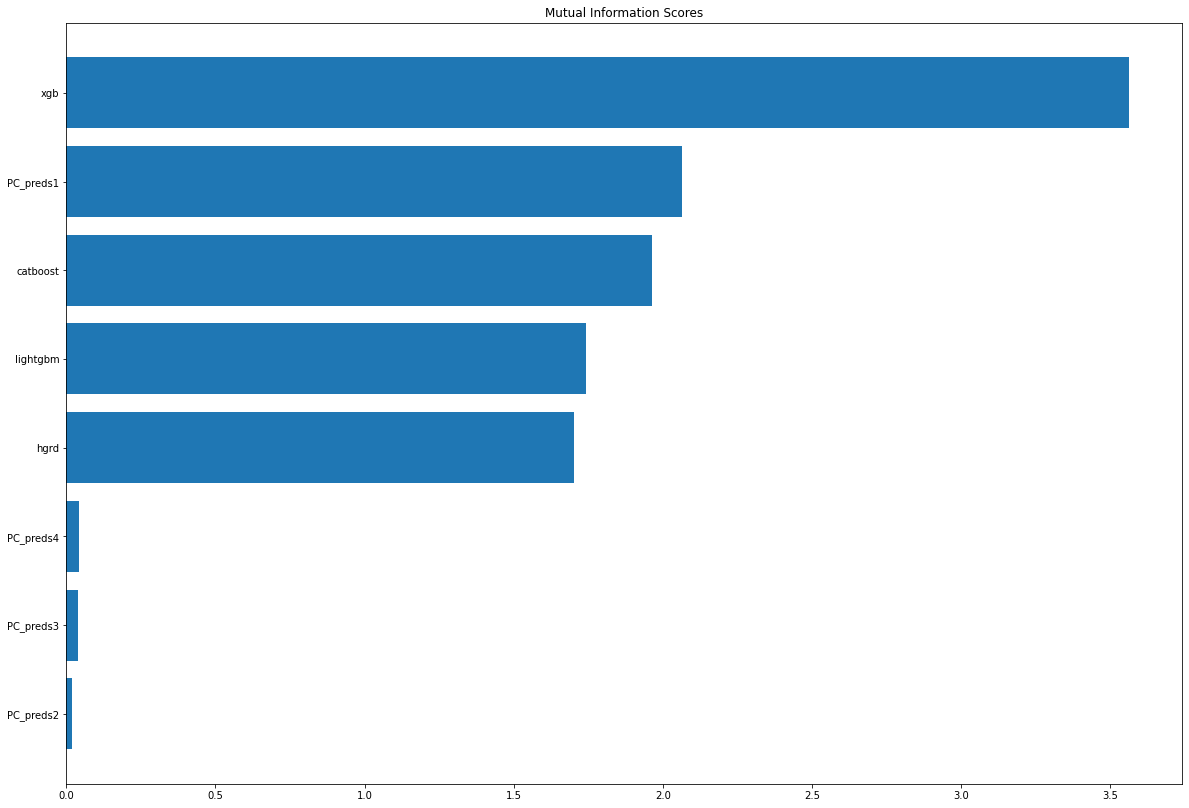

In [31]:
mi_scores_pca_ads = make_mi_scores_Regressor(X_train=preds_train_pca, y_train=preds_df_train['log_target'])
plot_mi_scores(scores=mi_scores_pca_ads)

In [19]:
X = preds_train_pca
y= preds_df_train['log_target']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

my_model = RandomForestRegressor(n_estimators=100,random_state=0).fit(train_X, train_y)

#calculate and show importances with the eli5 library:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
1.9606 ± 0.0894,xgb
0.0014 ± 0.0001,PC_preds1
0.0012 ± 0.0000,catboost
0.0004 ± 0.0000,lightgbm
0.0003 ± 0.0000,PC_preds2
0.0003 ± 0.0000,PC_preds3
0.0001 ± 0.0000,hgrd
-0.0000 ± 0.0000,PC_preds4


In [21]:
np.exp(preds_df_test['xgb'])

0       122123.085938
1       157639.828125
2       173061.671875
3       179461.218750
4       176597.734375
            ...      
1454     79760.164062
1455     82655.156250
1456    140156.296875
1457    112506.664062
1458    194168.968750
Name: xgb, Length: 1459, dtype: float32

In [22]:
make_submission(preds=np.exp(preds_df_test['xgb']),alias='xgb2',path='sample_submission.csv',target_col='SalePrice')

In [28]:
log_target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1454    12.072547
1455    12.254868
1456    12.493133
1457    11.864469
1458    11.901590
Name: SalePrice, Length: 1459, dtype: float64

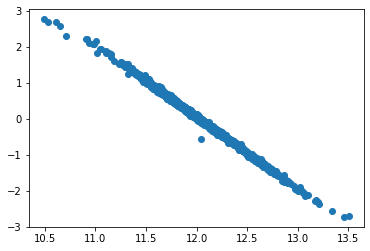

In [29]:
plt.scatter(preds_train_pca['catboost'],preds_train_pca['PC_preds1'])

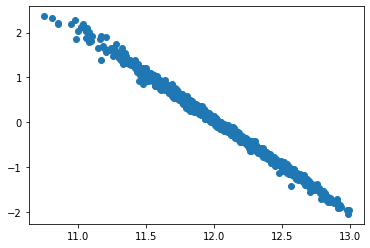

In [56]:
plt.scatter(preds_test_pca['catboost'],preds_test_pca['PC_preds1'])

In [33]:
rf.fit(preds_train_pca[['PC_preds1','catboost', 'xgb', 'lightgbm', 'hgrd']],preds_df_train['log_target'])

RandomForestRegressor(min_samples_split=10, n_estimators=200)

In [58]:
rf_stack2_preds = rf.predict(preds_test_pca[['PC_preds1','catboost', 'xgb', 'lightgbm', 'hgrd']])

In [59]:
np.exp(rf_stack2_preds)

array([121650.76073561, 157739.92109036, 172542.20819383, ...,
       139264.77570028, 110804.5616563 , 191666.59170057])

In [60]:
make_submission(preds=np.exp(rf_stack2_preds),alias='rf_stack2',path='sample_submission.csv',target_col='SalePrice')

In [61]:
rf.fit(preds_train_pca[['PC_preds1' ,'lightgbm', 'hgrd']],preds_df_train['log_target'])

RandomForestRegressor(min_samples_split=10, n_estimators=200)

In [62]:
rf_stack3_preds = rf.predict(preds_test_pca[['PC_preds1', 'lightgbm', 'hgrd']])

In [63]:
np.exp(rf_stack3_preds)

array([123372.07258947, 160624.51096544, 171638.61737614, ...,
       143230.0511787 , 116649.38092886, 202036.01289717])

In [68]:
loaded_predictions1 = (
    0.5 * np.exp(loaded['catboost'].predict(test_final)) +
    0.3 * np.exp(loaded['xgb'].predict(test_final)) +
    0.2 * np.exp(rf_stack3_preds) 
    #0.1 * np.exp(loaded['hgrd'].predict(test_final)) 
    #0.1 * np.exp(models['omp'].predict(test_final))
)

In [69]:
loaded_predictions1

array([125467.20610879, 158525.1697797 , 176380.52152006, ...,
       146525.94706094, 116465.23605218, 203215.34559134])

In [70]:
make_submission(preds=loaded_predictions1,alias='rf_stack3',path='sample_submission.csv',target_col='SalePrice')

In [34]:
rf.fit(preds_train_pca[['PC_preds1', 'hgrd']],preds_df_train['log_target'])

RandomForestRegressor(min_samples_split=10, n_estimators=200)

In [35]:
rf_stack4_preds = rf.predict(preds_test_pca[['PC_preds1', 'hgrd']])

In [36]:
np.exp(rf_stack4_preds)

array([128617.31056431, 161806.77859122, 176511.16115806, ...,
       142835.12112467, 117149.7411026 , 206957.01827881])

In [37]:
loaded_predictions2 = (
    0.5 * np.exp(loaded['catboost'].predict(test_final)) +
    0.2 * np.exp(loaded['xgb'].predict(test_final)) +
    0.2 * np.exp(loaded['lightgbm'].predict(test_final))+ 
    0.1*np.exp(rf_stack4_preds)
    #0.1 * np.exp(models['omp'].predict(test_final))
)

In [38]:
loaded_predictions2

array([127734.91144487, 158632.07704378, 179721.68308638, ...,
       148473.46456998, 117428.11728872, 206685.6624008 ])

In [78]:
make_submission(preds=loaded_predictions2,alias='rf_stack4',path='sample_submission.csv',target_col='SalePrice')

In [79]:
loaded_predictions3= (
    0.5 * np.exp(loaded['catboost'].predict(test_final)) +
    0.3 * np.exp(loaded['xgb'].predict(test_final)) +
    0.1 * np.exp(loaded['lightgbm'].predict(test_final))+ 
    0.1*np.exp(rf_stack4_preds)
    #0.1 * np.exp(models['omp'].predict(test_final))
)

In [80]:
loaded_predictions3

array([126833.71450099, 158512.76532683, 178360.83361423, ...,
       147292.60548106, 116740.71902402, 204949.37222472])

In [81]:
make_submission(preds=loaded_predictions3,alias='rf_stack5',path='sample_submission.csv',target_col='SalePrice')

In [ ]:
loaded_predictions3= (
    0.5 * np.exp(loaded['catboost'].predict(test_final)) +
    0.3 * np.exp(loaded['xgb'].predict(test_final)) +
    0.1 * np.exp(loaded['lightgbm'].predict(test_final))+ 
    0.1*np.exp(rf_stack4_preds)
    #0.1 * np.exp(models['omp'].predict(test_final))
)

## Feature Importance

{'Tot_Bsmt_per_Fin': 0.028490377835188596,
 'rare_Exterior1st_VinylSd': 0.02497841972836845,
 'rare_Exterior2nd_VinylSd': 0.024272133261145967,
 'Fireplaces': 0.021131569591280375,
 'HasFireplace': 0.020224802633481254,
 'GarageCars': 0.01883169241589089,
 'Count_Floors': 0.01841004279133962,
 'Has2ndFloor': 0.018356585422579563,
 'total_Area': 0.018281577758979317,
 'TotalQual': 0.018025449543977334,
 'Age_YrBuilt': 0.017785664922338906,
 'ScreenPorch': 0.015696963515076323,
 'GarageYrBlt': 0.015637153117617153,
 'GarageFinish_Unf': 0.015473331280145608,
 'rare_Exterior2nd_RARE': 0.014949920312294696,
 'Total_Home_Quality': 0.014533563780246173,
 'HouseStyle_1Story': 0.01442286079818822,
 'TotRmsAbvGrd': 0.014419502486318958,
 'rare_Condition1_Norm': 0.014297568525486248,
 'rare_Condition1_RARE': 0.014292681217148662,
 'Product_Home_Quality': 0.014153090677227365,
 'space_Cluster': 0.013472645924267113,
 'BsmtExposure_Mn': 0.013305003383089486,
 'rare_LotShape_Reg': 0.0131027936592060

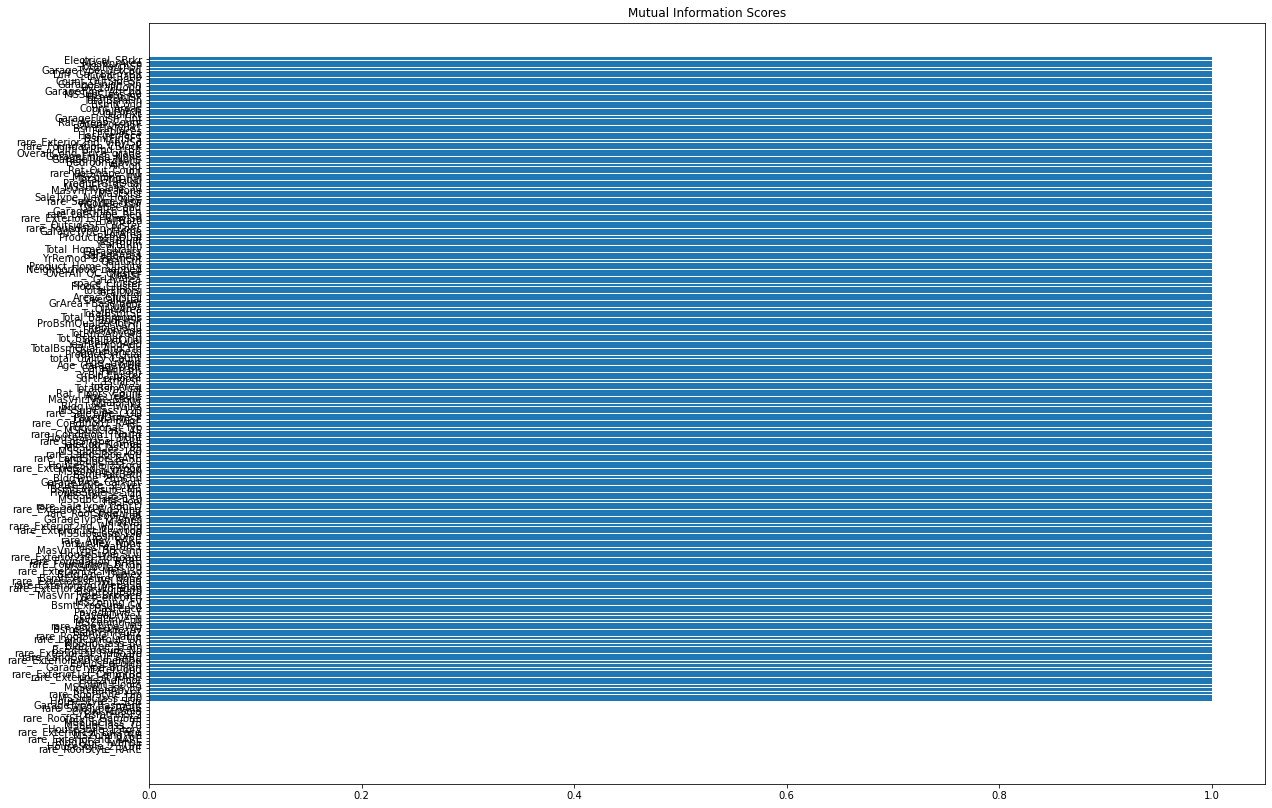

In [50]:
mi_scores_pca_ads = make_mi_scores_Regressor(X_train=train[features], y_train=log_target)
plot_mi_scores(scores=mi_scores_pca_ads>0)

In [51]:
mutual_dict =mi_scores_pca_ads.to_dict()

In [62]:
mi_scores_pca_ads[:20]

QualSFNg                0.903071
QlLivArea               0.765672
QualGr                  0.753343
GrArea+Basement         0.666038
OverallQual             0.567658
Areas_Cluster           0.516326
TotalQual               0.512665
total_Floors            0.497448
Floors_Cluster          0.484162
space_Cluster           0.484006
GrLivArea               0.481462
TotalSF                 0.465399
OverAll_QC_Cluster      0.458026
Neighborhood_mapped     0.452366
Product_Home_Quality    0.437206
QualGrg                 0.371018
YrRemod*Basement        0.365445
GarageArea              0.365214
GarageCars              0.362988
Total_Home_Quality      0.358133
Name: MI Scores, dtype: float64

In [53]:
mutual_dict

{'QualSFNg': 0.9030706289138233,
 'QlLivArea': 0.7656716075167385,
 'QualGr': 0.7533433620551953,
 'GrArea+Basement': 0.666038325371725,
 'OverallQual': 0.5676577209044691,
 'Areas_Cluster': 0.5163263000832852,
 'TotalQual': 0.5126652959648537,
 'total_Floors': 0.49744788712870314,
 'Floors_Cluster': 0.48416206560490105,
 'space_Cluster': 0.48400550928363906,
 'GrLivArea': 0.4814624331457451,
 'TotalSF': 0.46539889518859434,
 'OverAll_QC_Cluster': 0.4580262360457499,
 'Neighborhood_mapped': 0.4523657226979747,
 'Product_Home_Quality': 0.43720573664227347,
 'QualGrg': 0.371018447086354,
 'YrRemod*Basement': 0.36544492009151597,
 'GarageArea': 0.36521415603581797,
 'GarageCars': 0.36298754734503924,
 'Total_Home_Quality': 0.3581333956270183,
 'YearBlRm': 0.3578858665418152,
 'YearBuilt': 0.35753883932912256,
 'TotalBsmtSF': 0.34800646309074645,
 'ProductBsmQual': 0.34657940708772905,
 'Total_Bathrooms': 0.34516119528385225,
 'ProBsmQualPerTotFin': 0.3414915657731994,
 'Age_YrBuilt': 0.33

In [52]:
mutual_dict['Neighborhood_mapped']

0.4523657226979747

In [39]:
test[features]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Neighborhood_mapped,MasExist,AirCon,Electrical_SBrkr,Functional_Typ,GarageType_InHome,PavedDrive1,HasFence,MiscFeature1,SaleType_New_House,SaleCon_Normal,HasPool,Has2ndFloor,HasFireplace,total_Utility_Count,SqFtPerRoom,Total_Home_Quality,Product_Home_Quality,Total_Bathrooms,TotalSF,TotalPorchSF,YearBlRm,TotalExtQual,ProductExtQual,TotalBsmQual_And_Fin,TotalBsmQual,ProductBsmQual,TotalBsmFin,TotalGrgQual,ProductGrgQual,TotalQual,QualGr,QualPorch,QualExt,QualGrg,QlLivArea,QualSFNg,ProBsmQualPerTotFin,Age_YrBuilt,Age_YrRmd,Diff_YrRmd_YrBlt,Age_GarageYrBlt,Diff_GarYBlt_YrBlt,LivLotRatio,Spaciousness,GrArea+Basement,YrRemod*Basement,Count_OutSideSF,Rat_Out_Count,total_Area,Count_Areas,Rat_Areas_Count,total_Floors,Count_Floors,Rat_Floors_Count,Tot_Bsmt_per_Fin,OverallCond_Price_grade,space_Cluster,Areas_Cluster,Floors_Cluster,OutsideSF_Cluster,OverAll_QC_Cluster,YrBlt_Cluster,Cyclic_MoSold,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,rare_Exterior1st_BrkFace,rare_Exterior1st_CemntBd,rare_Exterior1st_HdBoard,rare_Exterior1st_MetalSd,rare_Exterior1st_Plywood,rare_Exterior1st_RARE,rare_Exterior1st_VinylSd,rare_Exterior1st_Wd Sdng,rare_Exterior1st_WdShing,rare_Exterior2nd_CmentBd,rare_Exterior2nd_HdBoard,rare_Exterior2nd_MetalSd,rare_Exterior2nd_Plywood,rare_Exterior2nd_RARE,rare_Exterior2nd_VinylSd,rare_Exterior2nd_Wd Sdng,rare_Exterior2nd_Wd Shng,rare_Alley_None,rare_Alley_RARE,rare_Condition1_Norm,rare_Condition1_RARE,rare_SaleType_COD,rare_SaleType_ConLD,rare_SaleType_New,rare_SaleType_RARE,rare_SaleType_WD,rare_RoofStyle_Flat,rare_RoofStyle_Gable,rare_RoofStyle_Gambrel,rare_RoofStyle_Hip,rare_RoofStyle_RARE,rare_LotShape_IR1,rare_LotShape_RARE,rare_LotShape_Reg,rare_LandContour_Lvl,rare_LandContour_RARE,rare_LandSlope_Gtl,rare_LandSlope_RARE,rare_Foundation_BrkTil,rare_Foundation_CBlock,rare_Foundation_PConc,rare_Foundation_RARE
0,0.508353,0.486131,-0.795118,24.530725,-0.330864,187473.961634,-0.814114,-0.20602,0.152284,-0.258311,0.643093,1.189924,2.341989,-0.024536,0.029390,-0.659856,-0.869439,-0.133649,-1.412168,-0.832529,-0.243011,-1.026295,-0.768931,-1.061998,-0.207681,-0.945997,-1.012897,-1.007664,156778.316021,-1.026334,1.204969,0.264059,0.960774,-1.072458,-0.404405,-0.128566,3.124990,-0.069416,-0.190549,-0.498156,-0.820466,0.263909,0.30611,0.271263,0.696953,0.256401,2.047479,-0.196046,-0.300722,0.321917,-0.069433,-0.871752,-1.055695,0.425225,-1.105142,-5.432238,-0.418388,-1.935752,-0.591974,0.634590,-0.748367,-0.709122,-0.664964,0.099481,-0.071997,-0.188051,0.088015,0.260940,0.272066,-0.429808,-1.263349,0.566654,-0.821408,1.181213,-1.249868,-0.883091,-0.460551,0.654307,36.054028,-0.756946,36.408991,-0.355167,-1.032308,-1.213443,-1.028894,0.092564,0.938244,0.48

In [41]:
X = preds_train_pca
y= preds_df_train['log_target']
#train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

#my_model = RandomForestRegressor(n_estimators=100,random_state=0).fit(train_X, train_y)

#calculate and show importances with the eli5 library:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(loaded['xgb'], random_state=1).fit(test[features], loaded_predictions2)
eli5.show_weights(perm, feature_names = features.tolist())

Weight,Feature
0.0000 ± 0.0000,QualSFNg
0.0000 ± 0.0000,QlLivArea
0.0000 ± 0.0000,QualGr
0.0000 ± 0.0000,OverallQual
0.0000 ± 0.0000,GrArea+Basement
0.0000 ± 0.0000,GarageCars
0.0000 ± 0.0000,TotalSF
0.0000 ± 0.0000,BsmtFinSF1
0.0000 ± 0.0000,YrRemod*Basement
0.0000 ± 0.0000,TotalQual


In [60]:
ord(perm)

TypeError: ord() expected string of length 1, but PermutationImportance found

In [ ]:
pd.read_table()